In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
corpus = pd.read_json("Automotive_5.json", lines=True, nrows=100000)

In [62]:
corpus.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,1430438400,NaN,None
1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,It sucks barely picks up anything definitely n...,sucks,1524096000,NaN,None
2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,"Well to write a short one, it blew 2 fuses of ...",Defective,1523836800,NaN,None
3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},Lauren,I have absolutely no memory of buying this but...,Looks cool! Probably works,1523577600,NaN,None
4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,it ok it does it job,Five Stars,1523145600,NaN,None


In [63]:
corpus.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [64]:
corpus.drop(columns=['verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'summary', 'unixReviewTime', 'vote',
       'image'], inplace=True)

In [65]:
corpus = pd.DataFrame(corpus)

In [66]:
print(type(corpus))

<class 'pandas.core.frame.DataFrame'>


In [67]:
corpus.rename(columns={'reviewText':'review', 'overall':'sentiment'}, inplace=True)

In [68]:
corpus.head()

,sentiment,review
0,4,"After I wrote the below review, the manufactur..."
1,1,It sucks barely picks up anything definitely n...
2,1,"Well to write a short one, it blew 2 fuses of ..."
3,3,I have absolutely no memory of buying this but...
4,5,it ok it does it job


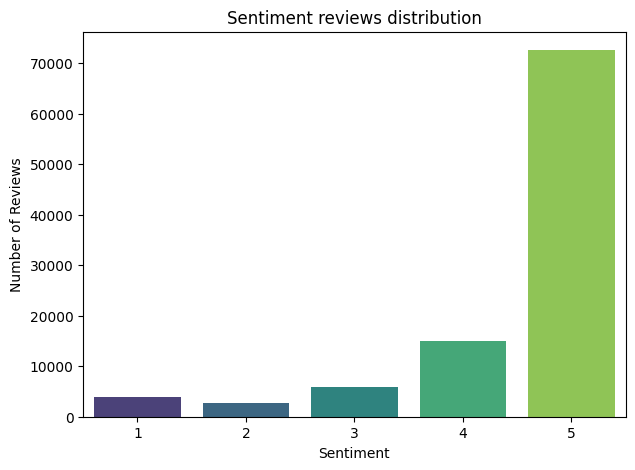

In [69]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=corpus, palette="viridis")
plt.title('Sentiment reviews distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [70]:
corpus["sentiment"].value_counts()

,count
sentiment,
5,72573
4,14943
3,5930
1,3836
2,2718


In [71]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

X = corpus.drop('sentiment', axis=1)
y = corpus['sentiment']

sampling_strategy = {
    1: 2500,
    2: 2500,
    3: 2500,
    4: 2500,
    5: 2500
}

rus = RandomUnderSampler(
    sampling_strategy=sampling_strategy,
    random_state=0
)

X, y = rus.fit_resample(X, y)

corpus = pd.concat([X, y], axis=1)
print(corpus.head())

                                                  review  sentiment
24505  First of all, a real A/C Cover will withstand ...          1
24481  Bought two of these, one white, one black.  Bl...          1
85981  Does not fit my 98 wrangler sport. This was ro...          1
89539  The readings were all over the place, plus or ...          1
63282  Bought this item at Pep Boys and on my first a...          1


In [72]:
corpus = corpus.sample(frac=1)
corpus.reset_index(drop=True, inplace=True)

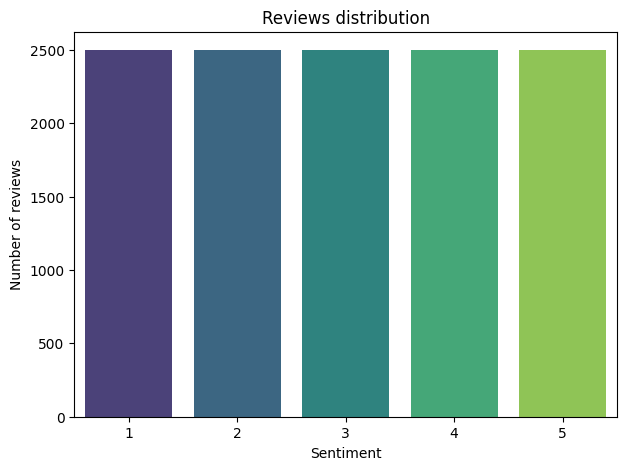

In [73]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment', data=corpus, palette="viridis")
plt.title('Reviews distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

I prefer to drop sentiment = 3 (neutral).

In [74]:
def label_sentiment(row):
    if int(row['sentiment']) <= 2:
        return 0
    if int(row['sentiment']) >= 4:
        return 1

In [75]:
corpus = corpus[corpus['sentiment'] != 3]
corpus['sentiment_label'] = corpus.apply(lambda row: label_sentiment(row), axis=1)

In [76]:
corpus.head()

,review,sentiment,sentiment_label
0,i use it in my r/c car differential,5,1
2,Bought two of these and one fell apart within ...,2,0
3,This device is similar to all others that proj...,2,0
4,Never fails to do what it should do,5,1
5,Either my head is swollen or this helmet size ...,1,0


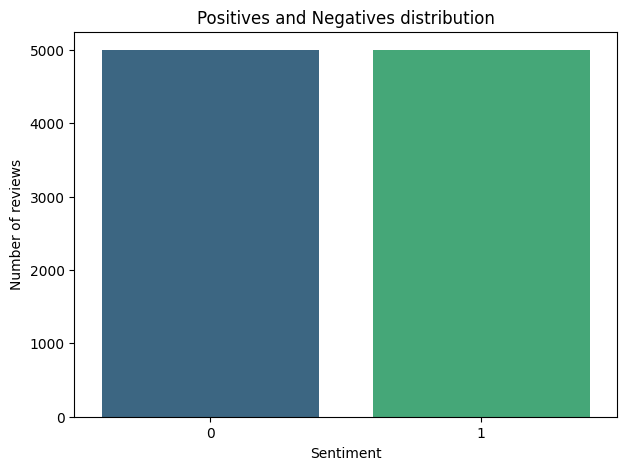

In [78]:
plt.figure(figsize=(7, 5))
sns.countplot(x='sentiment_label', data=corpus, palette="viridis")
plt.title('Positives and Negatives distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

**Vocabulary cardinality**

In [79]:
words = []

for text in corpus['review']:

  words_current = str(text).lower().split()
  words.extend(words_current)

vocab = set(words)
cardinality = len(vocab)

print(f"Carninality of the vocabulary (unique words): {cardinality}")

Carninality of the vocabulary (unique words): 30079


In [80]:
!pip install stop-words
from stop_words import get_stop_words

sw = get_stop_words(language = 'en')

final_words = [word for word in words if word not in sw]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 2.4 MB/s eta 0:00:00


In [81]:
final_vocab = set(final_words)
final_cardinality = len(final_vocab)

print(f"Vocabulary cardinality without stop words: {final_cardinality}")

Vocabulary cardinality without stop words: 29142


**Most frequent N-grams**

In [82]:
from nltk import ngrams
from nltk.probability import FreqDist

In [83]:
bigrams_ = list(ngrams(words, 2))
trigrams_ = list(ngrams(words, 3))

In [84]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [85]:
bg_freq.most_common(10)

[(('of', 'the'), 1830),
 (('on', 'the'), 1472),
 (('in', 'the'), 1381),
 (('i', 'have'), 993),
 (('it', 'is'), 975),
 (('to', 'the'), 972),
 (('for', 'the'), 880),
 (('and', 'the'), 843),
 (('on', 'my'), 816),
 (('it', 'was'), 799)]

In [86]:
tg_freq.most_common(10)

[(('i', 'had', 'to'), 286),
 (('i', 'bought', 'this'), 204),
 (('a', 'lot', 'of'), 184),
 (('out', 'of', 'the'), 179),
 (('this', 'is', 'a'), 171),
 (('i', 'have', 'a'), 136),
 (('if', 'you', 'have'), 135),
 (('one', 'of', 'the'), 132),
 (('you', 'have', 'to'), 123),
 (('it', 'is', 'a'), 116)]

**N-grams without stop words:**

In [87]:
bigrams_ = list(ngrams(final_words, 2))
trigrams_ = list(ngrams(final_words, 3))

In [88]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [89]:
bg_freq.most_common(10)

[(('data-hook="product-link-linked"', 'class="a-link-normal"'), 72),
 (('easy', 'install'), 66),
 (('easy', 'install.'), 61),
 (('waste', 'money'), 61),
 (('steering', 'wheel'), 59),
 (('oil', 'filter'), 57),
 (('waste', 'money.'), 55),
 (('license', 'plate'), 53),
 (('highly', 'recommend'), 51),
 (('heavy', 'duty'), 50)]

In [90]:
tg_freq.most_common(10)

[(('the&nbsp;<a', 'data-hook="product-link-linked"', 'class="a-link-normal"'),
  16),
 (('total', 'waste', 'money.'), 12),
 (('check', 'engine', 'light'), 11),
 (('steering', 'wheel', 'cover'), 10),
 (('reason', '4', 'stars'), 10),
 (('piaa', 'super', 'silicone'), 10),
 (('fram', 'oil', 'filters'), 9),
 (('waste', 'time', 'money.'), 9),
 (('local', 'auto', 'store.'), 9),
 (('super', 'silicone', 'wiper'), 9)]

**WORD CLOUD**

In [91]:
from wordcloud import WordCloud

In [92]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

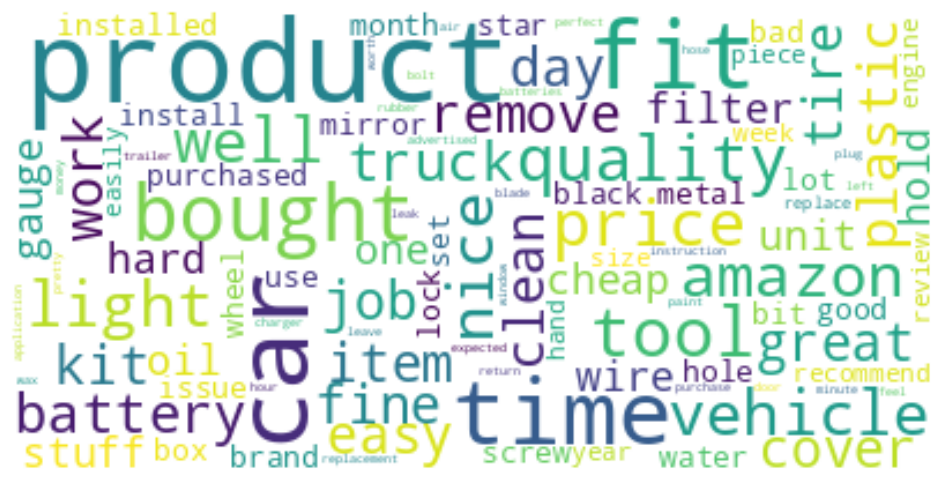

In [93]:
plot_word_cloud(final_words)